In [0]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from time import time
from sklearn.metrics import explained_variance_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree  import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [0]:
from google.colab import files
uploaded = files.upload()


Saving cleaned_melbourn_housing_data.csv to cleaned_melbourn_housing_data.csv


In [0]:
import pandas as pd
import io

df = pd.read_csv(io.StringIO(uploaded['cleaned_melbourn_housing_data.csv'].decode('utf-8')))
df


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,03-12-2016,2.5,3067,1,1,202.0,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,04-02-2016,2.5,3067,1,0,156.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,04-03-2017,2.5,3067,2,0,134.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,04-03-2017,2.5,3067,2,1,94.0,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,04-06-2016,2.5,3067,1,2,120.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20307,Wollert,35 Kingscote Wy,3,h,570000,SP,RW,24-02-2018,25.5,3750,2,2,404.0,Whittlesea City Council,-37.61031,145.03393,Northern Metropolitan,2940
20308,Yarraville,13 Burns St,4,h,1480000,PI,Jas,24-02-2018,6.3,3013,1,3,593.0,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543
20309,Yarraville,29A Murray St,2,h,888000,SP,Sweeney,24-02-2018,6.3,3013,2,1,98.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543
20310,Yarraville,147A Severn St,2,t,705000,S,Jas,24-02-2018,6.3,3013,1,2,220.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543


In [0]:

df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,03-12-2016,2.5,3067,1,1,202.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,04-02-2016,2.5,3067,1,0,156.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,04-03-2017,2.5,3067,2,0,134.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,04-03-2017,2.5,3067,2,1,94.0,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,04-06-2016,2.5,3067,1,2,120.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019


In [0]:
df.shape

(20312, 18)

In [0]:
df.isnull().sum().sum()

0

In [0]:
df.notnull().sum().sum()

365616

In [0]:
df.describe()

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
count,20312.000000,2.031200e+04,20312.000000,20312.000000,20312.000000,20312.000000,20312.000000,20312.000000,20312.000000,20312.000000
mean,3.067743,1.089994e+06,11.413283,3114.165961,1.596642,1.715242,597.812746,-37.806890,144.997336,7521.028358
std,0.944962,6.556246e+05,6.785729,114.554795,0.703154,0.992487,535.083347,0.091806,0.120199,4404.138049
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,14.000000,-38.190430,144.423790,121.000000
25%,2.000000,6.570000e+05,6.600000,3046.000000,1.000000,1.000000,308.000000,-37.861300,144.925048,4385.000000
50%,3.000000,9.100000e+05,10.500000,3087.000000,1.000000,2.000000,567.000000,-37.799700,145.004500,6567.000000
75%,4.000000,1.333250e+06,14.200000,3152.000000,2.000000,2.000000,696.000000,-37.748000,145.069500,10331.000000
max,16.000000,1.120000e+07,48.100000,3977.000000,9.000000,18.000000,9838.000000,-37.397800,145.526350,21650.000000


In [0]:
df['Car'].describe()

count    20312.000000
mean         1.715242
std          0.992487
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         18.000000
Name: Car, dtype: float64

In [0]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname',
       'Propertycount'],
      dtype='object')

In [0]:
df['Address'].unique()

array(['85 Turner St', '25 Bloomburg St', '5 Charles St', ...,
       '29A Murray St', '147A Severn St', '3 Tarrengower St'],
      dtype=object)

In [0]:
corr=df.corr()
corr

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.446619,0.277839,0.082095,0.608342,0.394134,-0.014018,0.016492,0.089371,-0.061032
Price,0.446619,1.000000,-0.235112,0.036561,0.432303,0.201527,0.002162,-0.218727,0.199539,-0.052472
Distance,0.277839,-0.235112,1.000000,0.499007,0.135514,0.242896,0.008899,-0.103722,0.202942,0.005891
Postcode,0.082095,0.036561,0.499007,1.000000,0.121407,0.060144,0.044108,-0.224152,0.375961,0.035832
Bathroom,0.608342,0.432303,0.135514,0.121407,1.000000,0.304772,0.027737,-0.049394,0.104054,-0.040512
Car,0.394134,0.201527,0.242896,0.060144,0.304772,1.000000,0.073518,-0.002738,0.042678,-0.012373
Landsize,-0.014018,0.002162,0.008899,0.044108,0.027737,0.073518,1.000000,-0.033221,0.064228,0.024792
Lattitude,0.016492,-0.218727,-0.103722,-0.224152,-0.049394,-0.002738,-0.033221,1.000000,-0.344002,0.026295
Longtitude,0.089371,0.199539,0.202942,0.375961,0.104054,0.042678,0.064228,-0.344002,1.000000,0.027038
Propertycount,-0.061032,-0.052472,0.005891,0.035832,-0.040512,-0.012373,0.024792,0.026295,0.027038,1.000000


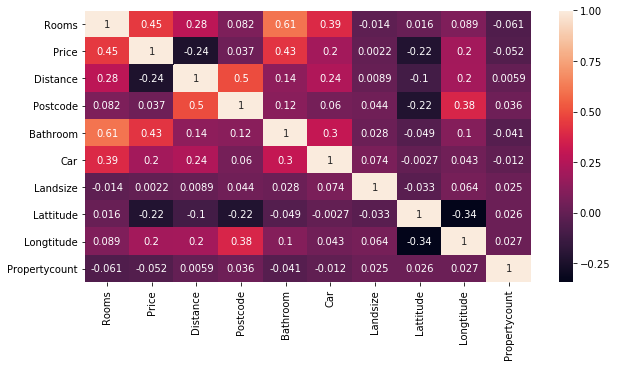

In [0]:
plt.subplots(figsize=(10,5))
sns.heatmap(corr,annot=True)

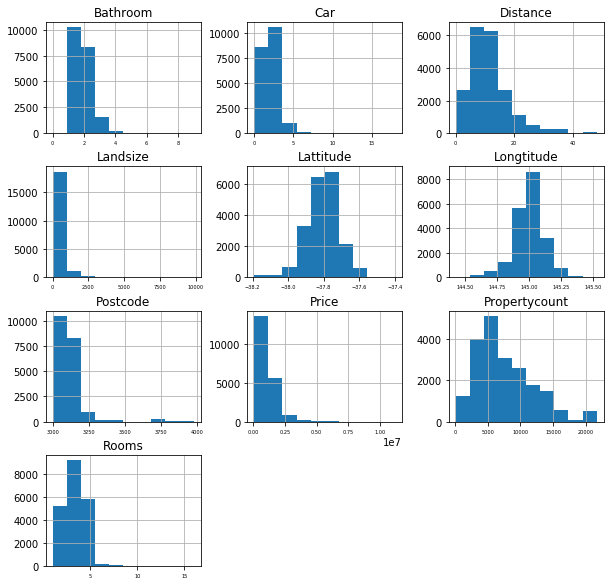

In [0]:
df.hist(bins=10,figsize=(10,10),xlabelsize=5,ylabelsize=10)
plt.show()

In [0]:
df.drop(["Address","Method","SellerG","Postcode","Date"],axis=1,inplace=True)

In [0]:
df

,Suburb,Rooms,Type,Price,Distance,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,2,h,1480000,2.5,1,1,202.0,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019
1,Abbotsford,2,h,1035000,2.5,1,0,156.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019
2,Abbotsford,3,h,1465000,2.5,2,0,134.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019
3,Abbotsford,3,h,850000,2.5,2,1,94.0,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019
4,Abbotsford,4,h,1600000,2.5,1,2,120.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20307,Wollert,3,h,570000,25.5,2,2,404.0,Whittlesea City Council,-37.61031,145.03393,Northern Metropolitan,2940
20308,Yarraville,4,h,1480000,6.3,1,3,593.0,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543
20309,Yarraville,2,h,888000,6.3,2,1,98.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543
20310,Yarraville,2,t,705000,6.3,1,2,220.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543


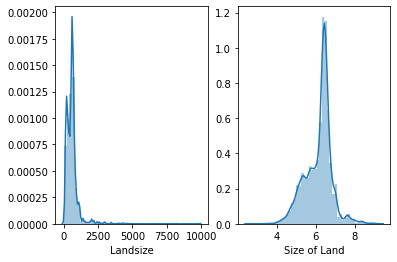

In [0]:
plt.subplot(1,2,1)
sns.distplot(df.Landsize)
plt.subplot(1,2,2)
sns.distplot(np.log(df.Landsize))
plt.xlabel("Size of Land")
plt.show()

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

label=le.fit_transform(df['Regionname'])
label



array([2, 2, 2, ..., 6, 6, 6])

In [0]:
from sklearn.preprocessing import OneHotEncoder
ht=OneHotEncoder()
df=ht.fit_transform(df[['Rooms']]).toarray()
df

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [0]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
df=MultiColumnLabelEncoder(columns = ['Regionname','Suburb','Type','CouncilArea']).fit_transform(df)

In [0]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,03-12-2016,2.5,3067,1,1,202.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,04-02-2016,2.5,3067,1,0,156.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,04-03-2017,2.5,3067,2,0,134.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,04-03-2017,2.5,3067,2,1,94.0,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,04-06-2016,2.5,3067,1,2,120.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019


In [0]:
x=df[['Rooms']]
y=df['Bathroom']

In [0]:
Y=np.array(y)
Y
 

array([1, 1, 2, ..., 2, 1, 1])

In [0]:
Y.shape

(20312,)

In [0]:
X.shape

(20312, 1)

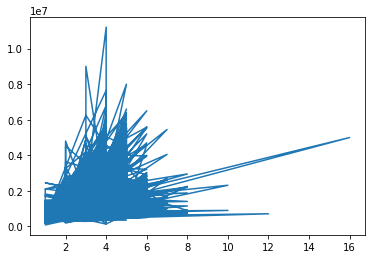

In [0]:
plt.plot(df['Rooms'],df['Price'])

In [0]:
df.corr()

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.446619,0.277839,0.082095,0.608342,0.394134,-0.014018,0.016492,0.089371,-0.061032
Price,0.446619,1.000000,-0.235112,0.036561,0.432303,0.201527,0.002162,-0.218727,0.199539,-0.052472
Distance,0.277839,-0.235112,1.000000,0.499007,0.135514,0.242896,0.008899,-0.103722,0.202942,0.005891
Postcode,0.082095,0.036561,0.499007,1.000000,0.121407,0.060144,0.044108,-0.224152,0.375961,0.035832
Bathroom,0.608342,0.432303,0.135514,0.121407,1.000000,0.304772,0.027737,-0.049394,0.104054,-0.040512
Car,0.394134,0.201527,0.242896,0.060144,0.304772,1.000000,0.073518,-0.002738,0.042678,-0.012373
Landsize,-0.014018,0.002162,0.008899,0.044108,0.027737,0.073518,1.000000,-0.033221,0.064228,0.024792
Lattitude,0.016492,-0.218727,-0.103722,-0.224152,-0.049394,-0.002738,-0.033221,1.000000,-0.344002,0.026295
Longtitude,0.089371,0.199539,0.202942,0.375961,0.104054,0.042678,0.064228,-0.344002,1.000000,0.027038
Propertycount,-0.061032,-0.052472,0.005891,0.035832,-0.040512,-0.012373,0.024792,0.026295,0.027038,1.000000


In [0]:
features=df.drop(["Price"],axis=1)
features.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,S,Biggin,03-12-2016,2.5,3067,1,1,202.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,S,Biggin,04-02-2016,2.5,3067,1,0,156.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,SP,Biggin,04-03-2017,2.5,3067,2,0,134.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,PI,Biggin,04-03-2017,2.5,3067,2,1,94.0,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,VB,Nelson,04-06-2016,2.5,3067,1,2,120.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019


In [0]:
target=df[['Rooms']]
target.head()

,Rooms
0,2
1,2
2,3
3,3
4,4


# **Conclussion of Model Fitting And Accuracy**

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
train_x,test_x,train_y,test_y=train_test_split(target,df['Bathroom'],test_size=0.20)

In [0]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train_x,train_y)
LR=lr.score(test_x,test_y)
pred=lr.predict(test_x)
varL = explained_variance_score(pred,test_y)
varL

-0.6220405867704548

In [0]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=10)
model.fit(train_x,train_y)
RF=model.score(test_x,test_y)
pred = model.predict(test_x)
varR = explained_variance_score(pred,test_y)
varR

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


-0.48410060649723885

In [0]:
 
est=GradientBoostingRegressor(n_estimators=400, max_depth=5, loss='ls',min_samples_split=2,learning_rate=0.1)
est.fit(train_x, train_y)
GR=est.score(test_x,test_y)
pred=est.predict(test_x)
varG = explained_variance_score(pred,test_y)
varG
 

-0.4851440489569543

In [0]:
decision=DecisionTreeRegressor()
decision.fit(train_x, train_y)
decc=decision.score(test_x,test_y)
pred=decision.predict(test_x)
varD = explained_variance_score(pred,test_y)
varD

-0.4851440489569463

In [2]:

from sklearn.ensemble import BaggingRegressor
from sklearn import tree
model = BaggingRegressor(n_estimators=10,random_state=1)
model.fit(train_x, train_y)
BG=model.score(test_x,test_y)
pred = model.predict(test_x)
BG
 


NameError: name 'train_x' is not defined

In [0]:
varB = explained_variance_score(pred,test_y)
varB

-0.4851440489569543

In [0]:
AllScore=[["Linear",LR,varL],["RandomForest",RF,varR],["GradientBoosting",GR,varG],["DecisionTree",decc,varD],['Bagging',BG,varB]]

In [0]:
df1 = pd.DataFrame(AllScore, columns = ['Model', 'Accuracy','variance_score'])
df1

,Model,Accuracy,variance_score
0,Linear,0.381630,-0.622041
1,RandomForest,0.402749,-0.484101
2,GradientBoosting,0.403445,-0.485144
3,DecisionTree,0.403445,-0.485144
4,Bagging,0.403774,-0.485144


In [0]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=22, random_state=1)
er = VotingRegressor([('lr', r1), ('rf', r2)])
X=np.array(x)
Y=np.array(y)
er.fit(X,Y)

VotingRegressor(estimators=[('lr',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('rf',
                             RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                 

In [0]:
er.score(test_x,test_y)

0.3985487397040428

In [0]:
df.describe()

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
count,20312.000000,2.031200e+04,20312.000000,20312.000000,20312.000000,20312.000000,20312.000000,20312.000000,20312.000000,20312.000000
mean,3.067743,1.089994e+06,11.413283,3114.165961,1.596642,1.715242,597.812746,-37.806890,144.997336,7521.028358
std,0.944962,6.556246e+05,6.785729,114.554795,0.703154,0.992487,535.083347,0.091806,0.120199,4404.138049
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,14.000000,-38.190430,144.423790,121.000000
25%,2.000000,6.570000e+05,6.600000,3046.000000,1.000000,1.000000,308.000000,-37.861300,144.925048,4385.000000
50%,3.000000,9.100000e+05,10.500000,3087.000000,1.000000,2.000000,567.000000,-37.799700,145.004500,6567.000000
75%,4.000000,1.333250e+06,14.200000,3152.000000,2.000000,2.000000,696.000000,-37.748000,145.069500,10331.000000
max,16.000000,1.120000e+07,48.100000,3977.000000,9.000000,18.000000,9838.000000,-37.397800,145.526350,21650.000000


In [0]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

sc.fit_transform(df[['Rooms','Bathroom']])

array([[0.06666667, 0.11111111],
       [0.06666667, 0.11111111],
       [0.13333333, 0.22222222],
       ...,
       [0.06666667, 0.22222222],
       [0.06666667, 0.11111111],
       [0.06666667, 0.11111111]])

In [0]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

d=sc.fit_transform(df[['Rooms','Bathroom','Price','Distance']])
d

array([[-1.12995983, -0.84854336,  0.59487623, -1.31356592],
       [-1.12995983, -0.84854336, -0.08388259, -1.31356592],
       [-0.07169055,  0.57365424,  0.57199672, -1.31356592],
       ...,
       [-1.12995983,  0.57365424, -0.3081018 , -0.75355334],
       [-1.12995983, -0.84854336, -0.58723183, -0.75355334],
       [-1.12995983, -0.84854336, -0.1067621 , -0.75355334]])